# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = news_api = ('aed06f6e5d434eea94b784c2c48927b3')
print(api_key)

aed06f6e5d434eea94b784c2c48927b3


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

print(api_key)

aed06f6e5d434eea94b784c2c48927b3


In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin", 
    language="en"
)
bitcoin_headlines

# Transform the response dictionary to a DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])

bitcoin_df.head(5)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Lifehacker.com'}","Mike Winters on Two Cents, shared by Mike Wint...",Is the New Visa Bitcoin Rewards Card Worth It?,Visa has partnered with cryptocurrency startup...,https://twocents.lifehacker.com/is-the-new-vis...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-03T22:00:00Z,Visa has partnered with cryptocurrency startup...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,Bitcoin passes $20k and reaches all-time high,After reaching a previous all-time high on Nov...,http://techcrunch.com/2020/12/16/bitcoin-passe...,https://techcrunch.com/wp-content/uploads/2017...,2020-12-16T17:12:40Z,After reaching a previous all-time high on Nov...
2,"{'id': None, 'name': 'Gizmodo.com'}",Rhett Jones,"Bitcoin Blows Past $20,000 Milestone",It’s been almost three years to the day since ...,https://gizmodo.com/bitcoin-blows-past-20-000-...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-16T15:15:00Z,Its been almost three years to the day since t...
3,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,"Bitcoin is flirting with $20,000 again. How hi...","In November 2017, after an absolutely massive,...",https://mashable.com/article/bitcoin-20000/,https://mondrian.mashable.com/2020%252F11%252F...,2020-11-20T20:02:17Z,"In November 2017, after an absolutely massive,..."
4,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,You can now spend China's digital currency at ...,China’s official digital currency is now usabl...,https://www.engadget.com/jd-com-supports-china...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-12-06T22:37:18Z,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum", 
    language="en"
)
ethereum_headlines

# Transform the response dictionary to a DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum_headlines["articles"])

ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
1,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
2,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:48:00Z,LONDON (Reuters) - Digital currencies Ethereum...
3,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,https://www.reuters.com/article/crypto-currenc...,https://static.reuters.com/resources/r/?m=02&d...,2020-12-16T16:46:00Z,FILE PHOTO: Representations of virtual currenc...
4,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,https://in.reuters.com/article/crypto-currency...,https://static.reuters.com/resources/r/?m=02&d...,2020-12-16T16:35:00Z,FILE PHOTO: A representation of virtual curren...


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article ["content"]
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment ["pos"]
        neu = sentiment ["neu"]
        neg = sentiment ["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound, 
            "positive": pos,
            "negative": neg, 
            "neutral": neu 
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

#Reorder DataFrame columns
cols = ["text", "date", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()
        

,text,date,compound,positive,negative,neutral
0,Visa has partnered with cryptocurrency startup...,2020-12-03,0.6369,0.162,0.0,0.838
1,After reaching a previous all-time high on Nov...,2020-12-16,0.6486,0.174,0.0,0.826
2,Its been almost three years to the day since t...,2020-12-16,0.4019,0.072,0.0,0.928
3,"In November 2017, after an absolutely massive,...",2020-11-20,0.2023,0.050,0.0,0.950
4,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.0000,0.000,0.0,1.000


In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_headlines["articles"]:
    try:
        text = article ["content"]
        date = article ["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment ["pos"]
        neu = sentiment ["neu"]
        neg = sentiment ["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound, 
            "positive": pos,
            "negative": neg, 
            "neutral": neu 
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

#Reorder DataFrame columns
cols = ["text", "date", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,text,date,compound,positive,negative,neutral
0,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.0,1.000
1,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.0,1.000
2,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,0.4215,0.088,0.0,0.912
3,FILE PHOTO: Representations of virtual currenc...,2020-12-16,0.0000,0.000,0.0,1.000
4,FILE PHOTO: A representation of virtual curren...,2020-12-16,0.0000,0.000,0.0,1.000


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.238942,0.070053,0.009368,0.920579
std,0.357613,0.079392,0.028447,0.083627
min,-0.585900,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.202300,0.050000,0.000000,0.950000
75%,0.532650,0.157000,0.000000,1.000000
max,0.801600,0.209000,0.103000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.091955,0.044550,0.014050,0.941400
std,0.251162,0.077609,0.046844,0.101239
min,-0.340000,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.931500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.177900,0.064000,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum shows the highest mean positive score at 0.057700 vs. 0.050737 compared to Bitcoin. 

Q: Which coin had the highest compound score?

A: Ethereum shows the highest compound score at 0.877900 vs. 0.765000 compared to Bitcoin. 

Q. Which coin had the highest positive score?

A: Ethereum takes the lead again at 0.318000 vs. 0.174000.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
#nltk.download('stopwords')
#nltk.download('newsapi')
#nltk.download('punkt')
#nltk.download('wordnet')


In [11]:
wnl = WordNetLemmatizer()
stop = stopwords.words('english')

stop.append("...")
stop.append("''")
stop.append("‘")
stop.append("\‘")
stop.append("\`")
stop.append("``")
stop.append('char')
stop.append("u")
stop.append("it'")


stop = set(stop)


sentence = sent_tokenize(article)[1]
print(sentence)

words = word_tokenize(sentence)
print(words)

lemmatizer = WordNetLemmatizer()
# NLTK list of stopwords
print(stopwords.words('english'))

stopwords = set(stopwords.words('english'))
first_result = [word.lower() for word in words if word.lower() not in stopwords]
print(first_result)

# Expand the default stopwords list if necessary
stop_words = set(stopwords.words ("english"))
stopwords_addon = {'said', 'sent', 'found', 'inclusion', 'today', 'announced', 'week', 
                       'basically', 'also', ',', 'weekly', 'bitcoin', 'ethereum', 
                       'following'}
second_result = [word.lower() for word in words if word.lower() not in stopwords.union(stopwords_addon) 
print(second_result)

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    # Substitute everything that is NOT a letter with empty string 
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', sentence)
    re_words = word_tokenize(re_clean)
    re_result = [word.lower() for word in re_words if word.lower() not in sw.union(stopwords_addon)]

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    return tokens


In [12]:
def tokenizer(text): #lambda, filter map
    
    
    words = word_tokenize(text)
    
    
    words = list(filter(lambda w: w.lower(), words))
    
    words = list(filter(lambda t: t not in punctuation, words))
    
    words = list(filter(lambda t: t.lower not in stop, words))
    
    tokens = [wnl.lemmatize(word) for word in words] #list comph
    
    
    return tokens
    

In [13]:
# Create a new tokens column for bitcoin
bitcoin_df['token'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df

,text,date,compound,positive,negative,neutral,token
0,Visa has partnered with cryptocurrency startup...,2020-12-03,0.6369,0.162,0.000,0.838,"[Visa, ha, partnered, with, cryptocurrency, st..."
1,After reaching a previous all-time high on Nov...,2020-12-16,0.6486,0.174,0.000,0.826,"[After, reaching, a, previous, all-time, high,..."
2,Its been almost three years to the day since t...,2020-12-16,0.4019,0.072,0.000,0.928,"[Its, been, almost, three, year, to, the, day,..."
3,"In November 2017, after an absolutely massive,...",2020-11-20,0.2023,0.050,0.000,0.950,"[In, November, 2017, after, an, absolutely, ma..."
4,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.0000,0.000,0.000,1.000,"[Unlike, ‘, conventional, ’, cryptocurrencies,..."
5,If youve been watching the crypto markets over...,2020-11-25,0.4404,0.152,0.075,0.773,"[If, youve, been, watching, the, crypto, marke..."
6,Six years after the launch of the Mexico-based...,2020-12-09,0.0000,0.000,0.000,1.000,"[Six, year, after, the, launch, of, the, Mexic..."
7,Decentralized exchange protocols that allow cr...,2020-12-03,0.4019,0.117,0.000,0.883,"[Decentralized, exchange, protocol, that, allo..."
8,4. U.S. markets ended November with large gain...,2020-11-30,0.7650,0.171,0.000,0.829,"[4, U.S., market, ended, November, with, large..."
9,Illustration by Grayson Blackmon / The Verge\r...,2020-12-15,-0.5859,0.000,0.103,0.897,"[Illustration, by, Grayson, Blackmon, The, Ver..."


In [14]:
# Create a new tokens column for ethereum
ethereum_df['token'] = ethereum_df['text'].apply(tokenizer)
ethereum_df

,text,date,compound,positive,negative,neutral,token
0,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, Representation, of, the, Ethereu..."
1,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, Representation, of, the, Ethereu..."
2,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,0.4215,0.088,0.000,0.912,"[LONDON, Reuters, Digital, currency, Ethereum,..."
3,FILE PHOTO: Representations of virtual currenc...,2020-12-16,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, Representations, of, virtual, cu..."
4,FILE PHOTO: A representation of virtual curren...,2020-12-16,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, A, representation, of, virtual, ..."
5,FILE PHOTO: Representations of virtual currenc...,2020-12-16,0.0000,0.000,0.000,1.000,"[FILE, PHOTO, Representations, of, virtual, cu..."
6,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,0.1779,0.052,0.000,0.948,"[NEW, YORK, Reuters, Institutional, investor, ..."
7,NEW YORK (Reuters) - Institutional investors p...,2020-12-07,0.1779,0.052,0.000,0.948,"[NEW, YORK, Reuters, Institutional, investor, ..."
8,"PayPal has launched the Generosity Network, a ...",2020-11-19,0.8779,0.318,0.000,0.682,"[PayPal, ha, launched, the, Generosity, Networ..."
9,By Reuters Staff\r\nFILE PHOTO: A representati...,2020-11-26,0.0000,0.000,0.000,1.000,"[By, Reuters, Staff, FILE, PHOTO, A, represent..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams_btc = ngrams(tokenizer(bitcoin_df['text'].str.cat()), N)
Counter(grams_btc).most_common(10)

[(('of', 'the'), 6),
 (('in', 'this'), 5),
 (('char', 'By'), 4),
 (('FILE', 'PHOTO'), 4),
 (('seen', 'in'), 4),
 (('illustration', 'taken'), 4),
 (('2020', 'REUTERS/Dado'), 4),
 (('price', 'of'), 3),
 (('By', 'Reuters'), 3),
 (('Reuters', 'Staff'), 3)]

def process_text(doc):
    stopwords = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in stopwords]
    return output

processed = process_text(article)
print(processed)

word_counts = Counter(processed)
print(dict(word_counts))


bitcoin_bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams_eth = ngrams(tokenizer(ethereum_df['text'].str.cat()), N)
Counter(grams_eth).most_common(10)

[(('virtual', 'currency'), 11),
 (('in', 'this'), 11),
 (('FILE', 'PHOTO'), 10),
 (('seen', 'in'), 10),
 (('this', 'illustration'), 9),
 (('of', 'virtual'), 9),
 (('currency', 'Bitcoin'), 9),
 (('illustration', 'taken'), 9),
 (('2020', 'REUTERS/Dado'), 9),
 (('is', 'seen'), 8)]

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_token_btc = tokenizer(bitcoin_df['text'].str.cat())
token_count(all_token_btc, 10)

[('the', 29),
 ('of', 22),
 ('char', 19),
 ('Bitcoin', 12),
 ('in', 11),
 ('a', 11),
 ('and', 11),
 ('to', 9),
 ('ha', 8),
 ('with', 7)]

In [20]:
# Get the top 10 words for Ethereum
all_token_eth = tokenizer(ethereum_df['text'].str.cat())
token_count(all_token_eth, 10)

[('char', 20),
 ('of', 18),
 ('Reuters', 17),
 ('the', 16),
 ('in', 16),
 ('Bitcoin', 14),
 ('a', 13),
 ('virtual', 12),
 ('currency', 12),
 ('is', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=600).generate(text)
    plt.imshow(df_cloud)
    plt.show()

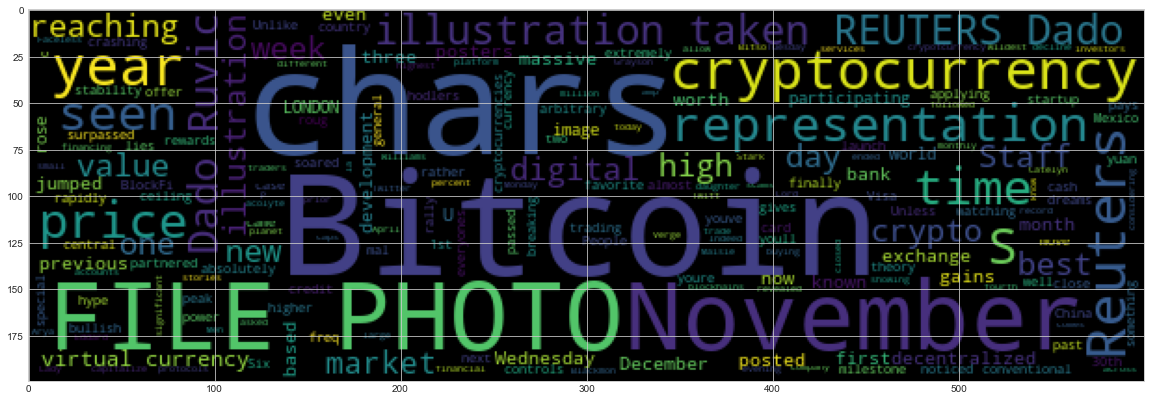

In [23]:
wordcloud(bitcoin_df['text'].str.cat(), title="bitcoin")

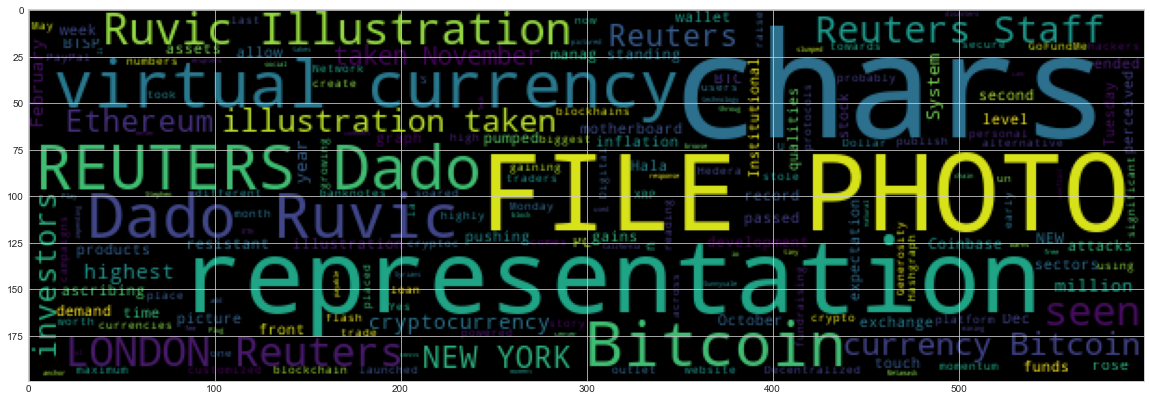

In [122]:
# Generate the Ethereum word cloud
wordcloud(ethereum_df['text'].str.cat(), title="ethereum")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")
print(spacy)

<module 'spacy' from 'C:\\Users\\hatti\\anaconda3\\lib\\site-packages\\spacy\\__init__.py'>


## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
doc = nlp(spacy.load)
for ent in doc.ents:
    print(ent.text, ent.label_)

TypeError: object of type 'function' has no len()

In [31]:
# Run the NER processor on all of the text
doc = nlp(article)
displacy.render(doc, style='ent')

# Add a title to the document
# YOUR CODE HERE!

TypeError: Argument 'string' has incorrect type (expected str, got dict)

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!